# Chapter 3: Multiple regression in action


## Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model

In [2]:
%matplotlib inline 
# If you are using IPython, this will make the images available in the notebook

In [3]:
boston = load_boston() 
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

In [4]:
observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:,:-1]
y = dataset['target'].values

## Using multiple features

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()

In [7]:
# As an alternative, this example is using the statsmodels.formula.api module
# Equivalent to the R syntax for linear models, it requires to specify the form
# of the linear regression using 'response ~ predictor1 (+ predictor2 + ...)'
#linear_regression = smf.ols(formula = 'target ~ CRIM + ZN +INDUS + CHAS + NOX + RM + AGE + DIS +\
#                                                 RAD + TAX + PTRATIO + B + LSTAT', data=dataset)
#fitted_model# = linear_regression.fit(#)

In [8]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          6.72e-135
Time:                        07:29:05   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Correlation matrix

In [10]:
X = dataset.iloc[:,:-1]
correlation_matrix = X.corr()
print (correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

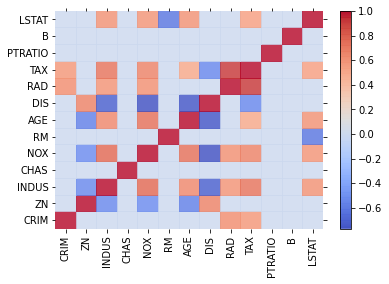

In [11]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(X, hurdle=0.5)

In [11]:
corr = np.corrcoef(X, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

In [12]:
print (eigenvalues)

[ 6.12265476  1.43206335  1.24116299  0.85779892  0.83456618  0.65965056
  0.53901749  0.39654415  0.06351553  0.27743495  0.16916744  0.18616388
  0.22025981]


In [13]:
print (eigenvectors[:,8])

[-0.04552843  0.08089873  0.25126664 -0.03590431 -0.04389033 -0.04580522
  0.03870705  0.01828389  0.63337285 -0.72024335 -0.02350903  0.00485021
 -0.02477196]


In [14]:
print (variables[2], variables[8], variables[9])

INDUS RAD TAX


## Revisiting gradient descent

In [24]:
from sklearn.preprocessing import StandardScaler
observations = len(dataset)
variables = dataset.columns
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
original_stds = X.std().values
Xst = np.column_stack((Xst,np.ones(observations)))
y  = dataset['target'].values

In [19]:
standardization.mean_

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

In [26]:
import random
import numpy as np

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path
                                  
alpha = 0.01
w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations = 20000)
print ("These are our final standardized coefficients: " + ', '.join(map(lambda x: "%0.4f" % x, w)))                                   

These are our final standardized coefficients: -0.9281, 1.0816, 0.1409, 0.6817, -2.0567, 2.6742, 0.0195, -3.1040, 2.6622, -2.0768, -2.0606, 0.8493, -3.7436, 22.5328


In [27]:
unstandardized_betas = w[:-1] / original_stds
unstandardized_bias  = w[-1]-np.sum((original_means / original_stds) * w[:-1])

print ('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta,varname in zip(unstandardized_betas, variables):
    print ('%8s: %8.4f' % (varname, beta))

    bias:  36.4457
    CRIM:  -0.1079
      ZN:   0.0464
   INDUS:   0.0205
    CHAS:   2.6841
     NOX: -17.7490
      RM:   3.8061
     AGE:   0.0007
     DIS:  -1.4741
     RAD:   0.3057
     TAX:  -0.0123
 PTRATIO:  -0.9518
       B:   0.0093
   LSTAT:  -0.5242


## Figuring out importat features

### Working with standardized coefficients

In [18]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
# ATTENTION: Normalization = x -xmin/ xmax â€“ xmin   Zero Score Standardization = x - xmean/ xstd

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, linear_regression)

In [20]:
linear_regression.fit(X,y)
for coef, var in sorted(zip(map(abs,linear_regression.coef_), dataset.columns[:-1]), reverse=True):
    print ("%6.3f %s" % (coef,var))

17.796 NOX
 3.805 RM
 2.689 CHAS
 1.476 DIS
 0.953 PTRATIO
 0.525 LSTAT
 0.306 RAD
 0.107 CRIM
 0.046 ZN
 0.021 INDUS
 0.012 TAX
 0.009 B
 0.001 AGE


In [21]:
Stand_coef_linear_reg.fit(X,y)
for coef, var in sorted(zip(map(abs,Stand_coef_linear_reg.steps[1][1].coef_), dataset.columns[:-1]), reverse=True):
    print ("%6.3f %s" % (coef,var))

 3.749 LSTAT
 3.104 DIS
 2.671 RM
 2.659 RAD
 2.076 TAX
 2.062 PTRATIO
 2.060 NOX
 1.081 ZN
 0.920 CRIM
 0.857 B
 0.682 CHAS
 0.143 INDUS
 0.021 AGE


### Using R squared

In [22]:
from sklearn.metrics import r2_score

linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

print ('Baseline R2: %0.3f' %  r2_est(X,y))

Baseline R2: 0.741


In [23]:
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) -r2_est(X.values[:,selection],y)) ,dataset.columns[j]))
    
for imp, varname in sorted(r2_impact, reverse=True):
    print ('%6.3f %s' %  (imp, varname))

 0.057 LSTAT
 0.044 RM
 0.029 DIS
 0.028 PTRATIO
 0.011 NOX
 0.011 RAD
 0.006 B
 0.006 ZN
 0.006 TAX
 0.006 CRIM
 0.005 CHAS
 0.000 INDUS
 0.000 AGE


## Interaction model

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
create_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [25]:
def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

baseline = r2_est(X,y)
print ('Baseline R2: %0.3f' %  baseline)

Baseline R2: 0.741


In [26]:
Xi = create_interactions.fit_transform(X)
main_effects = create_interactions.n_input_features_

In [27]:
for k,effect in \
    enumerate(create_interactions.powers_[(main_effects):]):
    termA, termB = variables[effect==1]
    increment = r2_est(Xi[:,list(range(0,main_effects)) \
                + [main_effects+k]],y) - baseline
    if increment > 0.01:
        print ('Adding interaction %8s *%8s R2: %5.3f' %  (termA, \
                termB, increment))

Adding interaction     CRIM *    CHAS R2: 0.011
Adding interaction     CRIM *      RM R2: 0.021
Adding interaction       ZN *      RM R2: 0.013
Adding interaction    INDUS *      RM R2: 0.038
Adding interaction    INDUS *     DIS R2: 0.013
Adding interaction      NOX *      RM R2: 0.027
Adding interaction       RM *     AGE R2: 0.024
Adding interaction       RM *     DIS R2: 0.018
Adding interaction       RM *     RAD R2: 0.049
Adding interaction       RM *     TAX R2: 0.054
Adding interaction       RM * PTRATIO R2: 0.041
Adding interaction       RM *       B R2: 0.020
Adding interaction       RM *   LSTAT R2: 0.064


In [28]:
Xi = X
Xi['interaction'] = X['RM']*X['LSTAT']
print ('R2 of a model with RM*LSTAT interaction: %0.3f' %  r2_est(Xi,y))

R2 of a model with RM*LSTAT interaction: 0.805


## Polynomial regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
create_cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
create_highdegree = PolynomialFeatures(degree=7, interaction_only=False, include_bias=False)
linear_predictor = make_pipeline(linear_regression)
#quadratic_predictor = make_pipeline(create_quadratic, linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression)

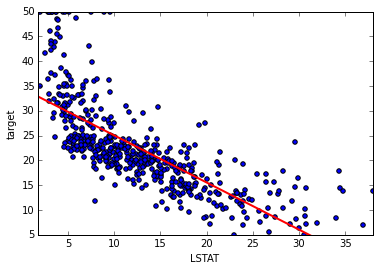

In [30]:
predictor = 'LSTAT'
x = dataset['LSTAT'].values.reshape((observations,1))
xt = np.arange(0,50,0.1).reshape((50/0.1,1))
x_range = [dataset[predictor].min(),dataset[predictor].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, linear_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2)

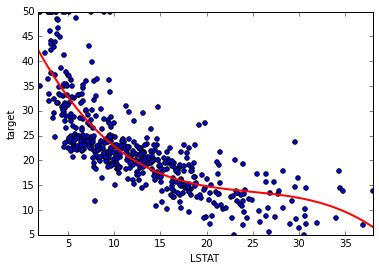

In [31]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, cubic_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2)

In [32]:
for d in [1,2,3,5,15]:
    create_poly = PolynomialFeatures(degree=d, interaction_only=False, include_bias=False)
    poly = make_pipeline(create_poly, StandardScaler(), linear_regression)
    model = poly.fit(x,y)
    print ("R2 degree - %2i polynomial :%0.3f" %(d,r2_score(y,model.predict(x))))

R2 degree -  1 polynomial :0.544
R2 degree -  2 polynomial :0.641
R2 degree -  3 polynomial :0.658
R2 degree -  5 polynomial :0.682
R2 degree - 15 polynomial :0.695


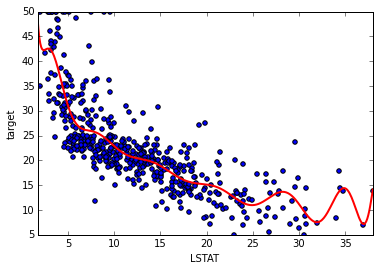

In [33]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, model.predict(xt), '-', color='red', linewidth=2)